# Initial Dataset Exploration

## Data Loading

In [67]:
import sys
import os
import importlib

# Add project to path so we can import our modules
sys.path.append(os.path.abspath(".."))


In [68]:
# Import functionality from our source code
import src.data_loading.data_loader as data_loader
importlib.reload(data_loader)
from src.data_loading.data_loader import load_data, get_numerical_features, get_categorical_features

# Load the data
df = load_data()

# Display the first 5 rows of the dataset for a quick glance
print("\nFirst 5 Rows of the Dataset:\n")
df.head()

Loading data from c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\data\raw\credit_score_dataset.csv
Loaded dataset with 100000 rows and 27 columns

First 5 Rows of the Dataset:



,ID,Customer_ID,Month,Name,City,Street,Age,SSN,Occupation,Annual_Income,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,NaN,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,821-00-0265,Manager,19114.12,...,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529544,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.2802216,3
2,0x1604,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,821-00-0265,Manager,19114.12,...,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.69952126,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580744,3
4,NaN,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.42015309,3


In [69]:
# Display dataset shape in a readable format
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

# Display dataset information in a readable format
print("\n Dataset Information:\n")
df.info()

Dataset Shape: 100000 rows, 27 columns


 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-n

add some comments

In [70]:
df.isnull().sum()

ID                           9942
Customer_ID                  9893
Month                        9938
Name                        18887
City                         9851
Street                       9920
Age                         14488
SSN                         10001
Occupation                   9944
Annual_Income               10094
Monthly_Inhand_Salary       23595
Num_Bank_Accounts            9833
Num_Credit_Card             10062
Interest_Rate                9849
Num_of_Loan                 10191
Type_of_Loan                20312
Delay_from_due_date          9988
Num_of_Delayed_Payment      16218
Changed_Credit_Limit        10067
Num_Credit_Inquiries        11898
Credit_Mix                   9915
Outstanding_Debt             9963
Credit_Utilization_Ratio     9975
Credit_History_Age          18209
Payment_of_Min_Amount        9957
Amount_invested_monthly     14120
Credit_Score                    0
dtype: int64

## Analyze and visualize the distribution of the target class "Credit Scores"

<Axes: >

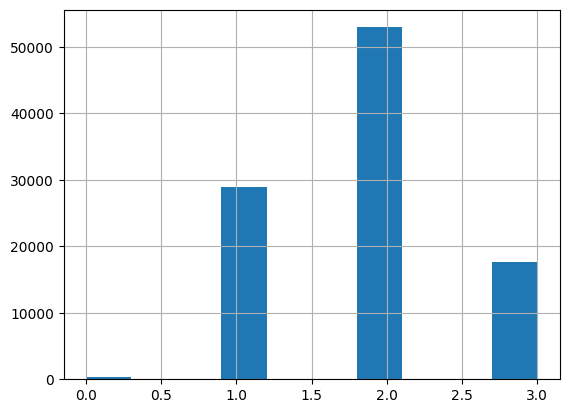

In [71]:
df['Credit_Score'].hist()

In [72]:
df['Credit_Score'].describe()

count    100000.000000
mean          1.880640
std           0.683065
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Credit_Score, dtype: float64

add some comments

## Exploring other features

### Numeric Features

In [73]:
list_numerical_features = get_numerical_features(df)

print("\nList of Numeric columns:")
for col in list_numerical_features:
    print(f"{col}: {df[col].dtype}")


List of Numeric columns:
Age: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Delay_from_due_date: float64
Num_Credit_Inquiries: float64
Credit_Utilization_Ratio: float64
Credit_Score: int64


In [74]:
df[list_numerical_features].describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_Score
count,85512.000000,76405.000000,90167.000000,89938.000000,90151.000000,90012.000000,88102.000000,90025.000000,100000.000000
mean,110.226845,4185.789272,17.105172,22.449410,72.343923,21.081156,27.846882,32.290967,1.880640
std,684.907588,3178.560506,117.728215,129.037233,465.684822,14.862707,193.610843,5.114670,0.683065
min,-500.000000,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.100770,0.000000
25%,24.000000,1625.023750,3.000000,4.000000,8.000000,10.000000,3.000000,28.064418,1.000000
50%,33.000000,3086.683333,6.000000,5.000000,13.000000,18.000000,6.000000,32.318280,2.000000
75%,42.000000,5940.317500,7.000000,7.000000,20.000000,28.000000,9.000000,36.502272,2.000000
max,8698.000000,15204.633330,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,3.000000


In [75]:
# add pairwise scatter plots (?) or smth else and comments

comments

### Relationship Between Numeric Features and Credit Score

<Axes: >

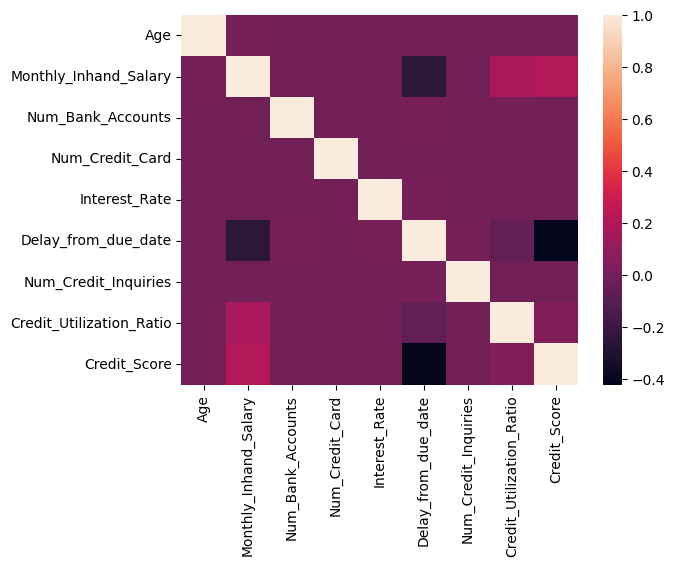

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson or Spearman correlation on numeric columns
corr = df[list_numerical_features].corr()
sns.heatmap(corr)

# improve and comments

comments

## Categorical features

In [77]:
list_categorical_features = get_categorical_features(df)
print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
ID: object
Customer_ID: object
Month: object
Name: object
City: object
Street: object
SSN: object
Occupation: object
Annual_Income: object
Num_of_Loan: object
Type_of_Loan: object
Num_of_Delayed_Payment: object
Changed_Credit_Limit: object
Credit_Mix: object
Outstanding_Debt: object
Credit_History_Age: object
Payment_of_Min_Amount: object
Amount_invested_monthly: object


In [78]:
df[list_categorical_features].value_counts()

ID       Customer_ID  Month     Name           City          Street        SSN          Occupation  Annual_Income  Num_of_Loan  Type_of_Loan                                                                                                  Num_of_Delayed_Payment  Changed_Credit_Limit  Credit_Mix  Outstanding_Debt  Credit_History_Age      Payment_of_Min_Amount  Amount_invested_monthly
0xffca   CUS_0x89c2   May       Joel Dimmockb  Standhampton  New Street    420-82-9596  Architect   18128.1        4            Home Equity Loan, Home Equity Loan, Auto Loan, and Debt Consolidation Loan                                    20                      11.91                 Standard    372.17            21 Years and 5 Months   Yes                    52.80867348                1
0x1000f  CUS_0xab6e   February  Swati Bhatx    BadShire      River Street  391-34-0662  Artist      20974.05       6            Auto Loan, Home Equity Loan, Home Equity Loan, Debt Consolidation Loan, Credit-Builder Loan, and 

We can notice that the only true categorical features are: ID, Customer_ID, Month, Name, City, Street, SSN, Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount While the others are numerical that need preprocessing

In [79]:
true_categorical_features = ['ID', 'Customer_ID', 'Month', 'Name', 'City', 'Street', 'SSN',
                              'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount']


# make some kind of visualizations that do not need encoding and comments

In [80]:

# get the non-null uniques
for col in true_categorical_features:
    vals = df[col].unique().tolist()
    print(f"Column '{col}' has {len(vals)} unique categories:")

Column 'ID' has 90059 unique categories:
Column 'Customer_ID' has 12501 unique categories:
Column 'Month' has 9 unique categories:
Column 'Name' has 10140 unique categories:
Column 'City' has 5 unique categories:
Column 'Street' has 32 unique categories:
Column 'SSN' has 12502 unique categories:
Column 'Occupation' has 22 unique categories:
Column 'Type_of_Loan' has 6261 unique categories:
Column 'Credit_Mix' has 5 unique categories:
Column 'Payment_of_Min_Amount' has 4 unique categories:


comments: for example saying that ID, Column_ID, Name, SSN are likely identifiers... while Type_ofLoan needs preprocessing to understand

In [81]:
# consider only 'Month', 'City', 'Street', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount'
# because they are the only with a reasonable number of categories

true_categorical_features = ['Month', 'City', 'Street', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']


### Relationship Between Categorical Features and Credit Score

Boxplot of Month and Credit_Score
Axes(0.125,0.11;0.775x0.77)


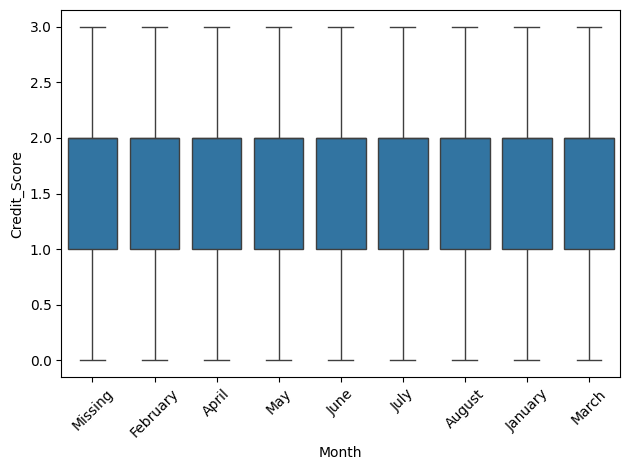

Boxplot of City and Credit_Score
Axes(0.125,0.11;0.775x0.77)


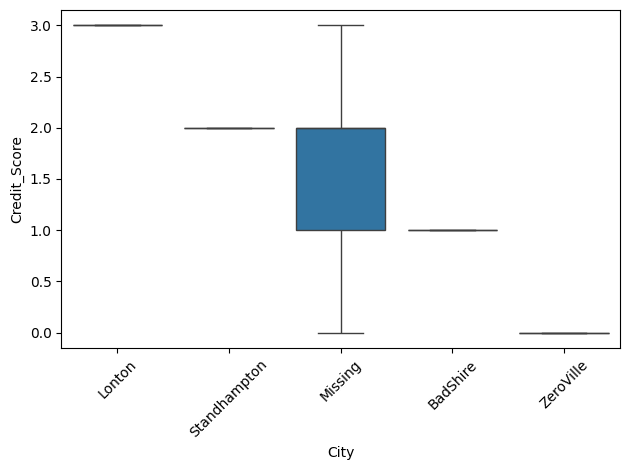

Boxplot of Street and Credit_Score
Showing only top 10 categories for Street
Axes(0.125,0.11;0.775x0.77)


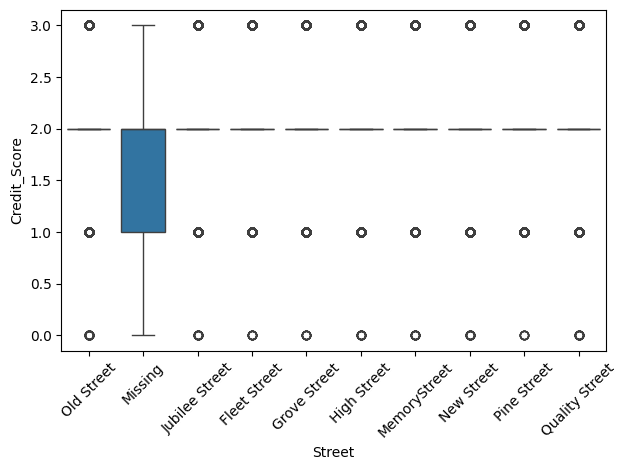

Boxplot of Occupation and Credit_Score
Showing only top 10 categories for Occupation
Axes(0.125,0.11;0.775x0.77)


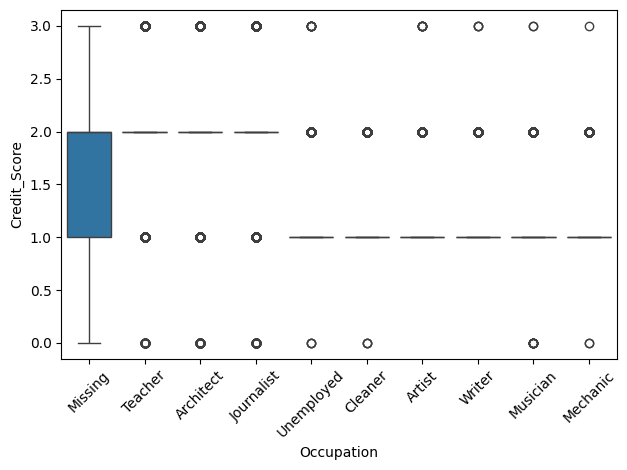

Boxplot of Credit_Mix and Credit_Score
Axes(0.125,0.11;0.775x0.77)


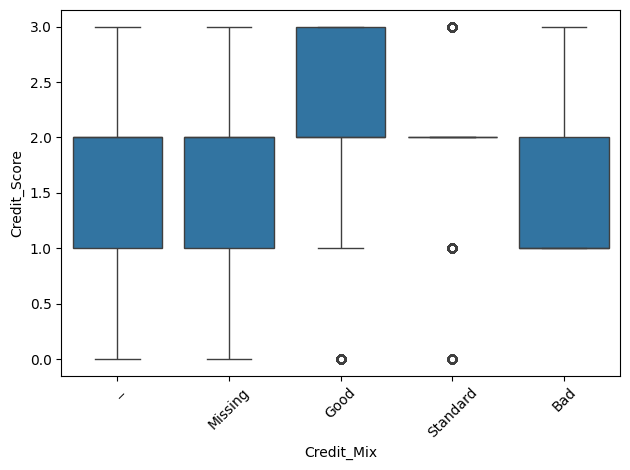

Boxplot of Payment_of_Min_Amount and Credit_Score
Axes(0.125,0.11;0.775x0.77)


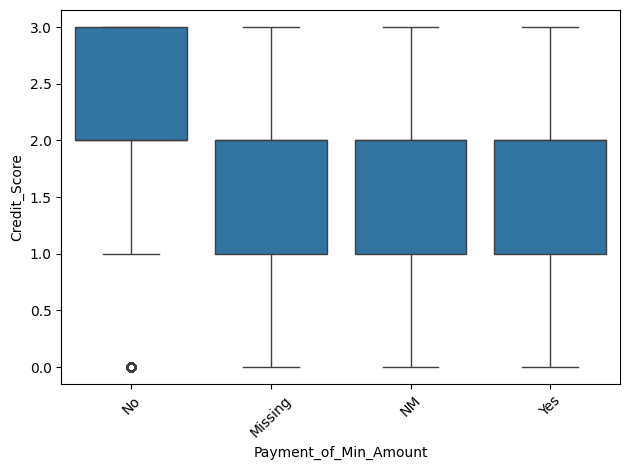

In [82]:
for feature in true_categorical_features:    
    print(f"Boxplot of {feature} and Credit_Score")
    # Create a copy of the dataframe for this visualization
    df_plot = df.copy()
    # Fill NaN values with 'Missing' to visualize them as a separate category
    df_plot[feature] = df_plot[feature].fillna('Missing')
    
    # Check if there are more than 10 categories
    if df_plot[feature].nunique() > 10:
        # Get the top 10 most frequent categories
        top_categories = df_plot[feature].value_counts().nlargest(10).index.tolist()
        # Filter the dataframe to include only top categories
        df_plot = df_plot[df_plot[feature].isin(top_categories)]
        print(f"Showing only top 10 categories for {feature}")
    
    print(sns.boxplot(x=feature, y='Credit_Score', data=df_plot))
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.tight_layout()
    plt.show()
    
    


# make other same type of visualizations per each of the true categorical features and comments
